# Iris Flower Species Classification

Richard Kaldenhoven


## 1. Problem Definition

Dataset from Kaggle:

https://www.kaggle.com/uciml/iris

The dataset contains information about the sepal length and petal length of three species of Iris flower: 
* Iris-versicolor
* Iris-setosa
* Iris-virginica 

The goal is to develop a machine learning model that can classify a flower as one of the species, given information about its sepal length and petal length.

## 2. Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load and preview the data:

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The dataset is balanced, in that it contains an equal number of observations for each species of flower. There are no missing values.

## 3. Exploratory Data Analysis

The following code generates plots to explore the data and investigate what machine learning technique may be most appropriate to classify the flower species.

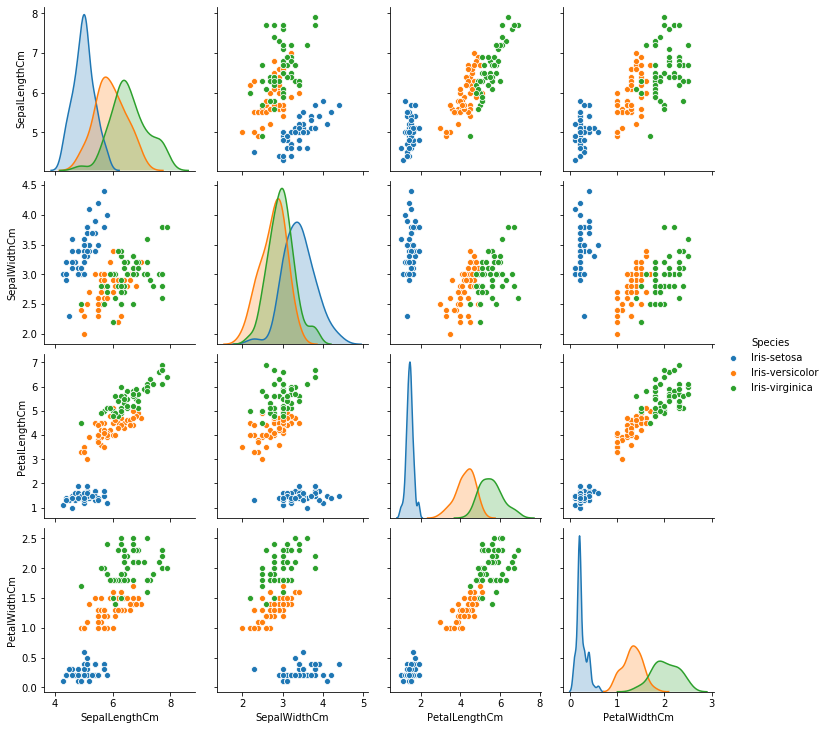

In [7]:
sns.pairplot(df.drop('Id',axis=1),hue='Species')

Text(0.5, 1.0, 'Iris Sepal Length vs. Sepal Width')

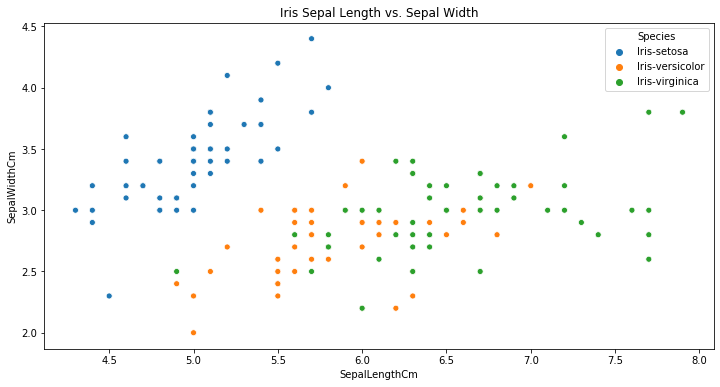

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')
plt.title('Iris Sepal Length vs. Sepal Width')

Text(0.5, 1.0, 'Iris Petal Length vs. Petal Width')

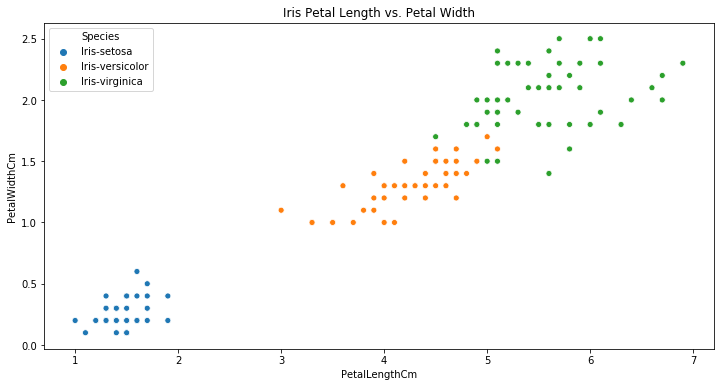

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')
plt.title('Iris Petal Length vs. Petal Width')

Considering the graphs above, it is observed that the Iris-setosa species can be separated from the other two species by a straight line, which will make it easier to classify than Iris-versicolor and Iris-virginica. 

For Iris-versicolor and Iris-virginica, there is more separation between the two in the Petal graph than the Sepal graph.

A linear separation between the data suggests that a Support Vector Machine (SVM) model would be a good choice.

## 4. Data Preparation

There are no missing values in the dataset that need to be dealt with, and the values are all on the same scale (cm). 

Normally to use distance based machine learning models the features would likely be scaled to avoid having one or more features dominate, but since all features are on the same scale in this case, no scaling is necessary.

All that is required is to drop the Id column, which is unnecessary, and to perform train/test/split to generate a training dataset and a test dataset from the original data.

In [10]:
df.drop('Id',axis=1,inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Species',axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5. Building a Support Vector Machine Model

The code below builds a Support Vector Machine (SVM) model with the scikit-learn framework. The grid search tool is utilized in order to find the best parameters for the model, and then classification predictions on the test set are made.

In [12]:
from sklearn.svm import SVC

svc_model = SVC()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

svc_model_grid = GridSearchCV(SVC(),param_grid,verbose=0)
svc_model_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
svc_model_grid.best_params_

{'C': 10, 'gamma': 0.1}

In [15]:
svc_predictions = svc_model_grid.predict(X_test)

## 6. Analyzing Results

A classificatication report is printed to display the performance metrics of the SVM model:

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,svc_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



For classification problems, a confusion matrix is a useful visualization of how the model predicted flower species compared to what the actual species are:

In [17]:
svc_conf_mat = pd.DataFrame(confusion_matrix(y_test,svc_predictions),
                            index=[['Actual','Actual','Actual'],['Iris-setosa','Iris-versicolor','Iris-virginica']],
                           columns=[['Predicted','Predicted','Predicted' ],['Iris-setosa','Iris-versicolor','Iris-virginica']])
svc_conf_mat

Predicted                               
                       Iris-setosa Iris-versicolor Iris-virginica
Actual Iris-setosa              16               0              0
       Iris-versicolor           0              17              1
       Iris-virginica            0               0             11

In [18]:
y_test.value_counts()

Iris-versicolor    18
Iris-setosa        16
Iris-virginica     11
Name: Species, dtype: int64

The SVM model has done very well, only misclassifying one Iris-versicolor as an Iris-virginica. Overall the SVM model has a 98% accuracy. We can see in the Precision and Recall scores that the model has failed to classify 1 Iris-versicolor, misclassifying it as a Iris-virginica, which lowers the precision for Iris-virginica and lowers the recall for Iris-versicolor.